In [7]:
import pandas as pd
import numpy as np
import seaborn as sn


from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [9]:
A=pd.read_csv('/Users/ranvir/Desktop/50_Startups.csv')
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


##### DUMMIES=pd.getd

In [18]:
sn.pairplot(A)

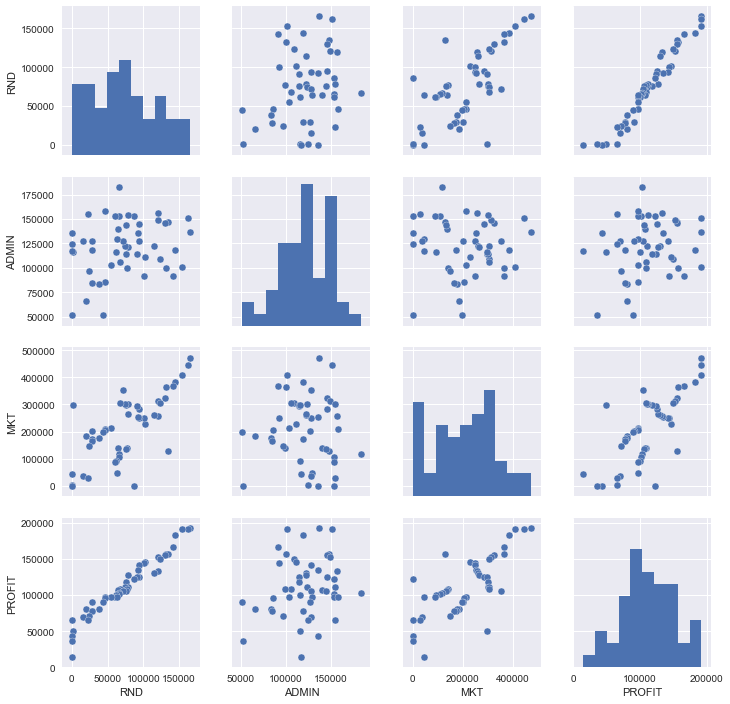

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


In [19]:
plt.show()
A.corr()

In [11]:
X=A[['RND']]
Y=A[['PROFIT']]
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.20,random_state=40)

In [12]:
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)

In [13]:
X2=sm.add_constant(xtrain)
est=sm.OLS(ytrain,X2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 PROFIT   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     771.4
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           7.59e-27
Time:                        22:45:07   Log-Likelihood:                -414.40
No. Observations:                  40   AIC:                             832.8
Df Residuals:                      38   BIC:                             836.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.058e+04   2491.042     20.306      0.0

In [14]:
print model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [15]:
predicted_profit=model.predict(xtest)
predicted_profit

array([[  96674.03507409],
       [ 105072.09707359],
       [  50583.91491454],
       [  67385.46236032],
       [  51414.64909164],
       [ 187913.56069189],
       [ 126785.5514702 ],
       [ 168610.19302512],
       [ 134196.32190841],
       [ 178023.71030419]])

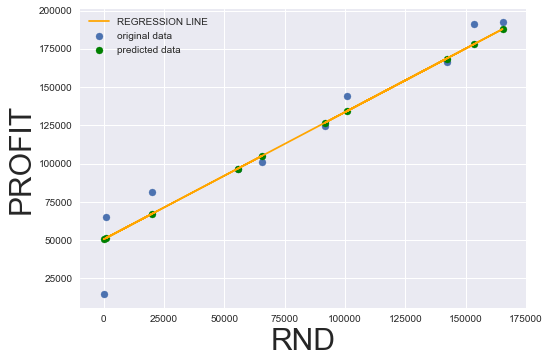

In [16]:
plt.scatter(xtest,ytest,label='original data')
plt.scatter(xtest,predicted_profit,color='green',label='predicted data')

yhat_predicted_profit= 5.058e+04+xtest*0.8305
plt.plot(xtest,yhat_predicted_profit,color='orange',label='REGRESSION LINE')

plt.xlabel('RND',fontsize=30)
plt.ylabel('PROFIT',fontsize=30)

plt.legend()
plt.show()

r-squared: 0.976243 


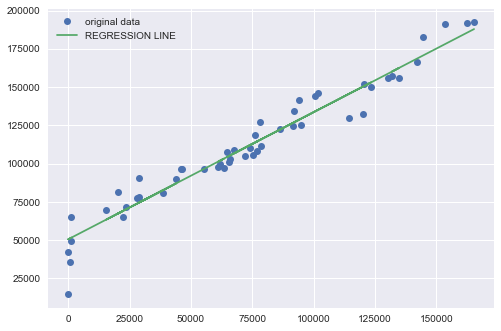

In [17]:

#METHOD 2 FOR REGRESSION TO FIND R2 - linregress()

slope,intercept,r_value,p_value,std_err=stats.linregress(xtrain.RND,ytrain.PROFIT)

print("r-squared: %f " %  r_value)

plt.plot(A.RND,A.PROFIT,'o',label='original data')
plt.plot(A.RND,intercept + slope*A.RND,label='REGRESSION LINE')
plt.legend()
plt.show()
